In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM


In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [4]:
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()

['measurement', 'station']

In [5]:
inspector = inspect(engine)

In [6]:
Base.metadata.create_all(engine)

In [7]:
# reflect an existing database into a new model
Measurement = Base.classes.measurement

Station = Base.classes.station

session = Session(bind = engine)


In [8]:
# reflect columns
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns2 = inspector.get_columns('station')
for column in columns2:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect the tables
engine.execute('SELECT * FROM measurement').fetchmany(10)

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [93]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# We can view all of the classes that automap found


In [12]:
# Create our session (link) from Python to the DB
# db = create_engine('sqlite:///hawaii.db')

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.prcp >= 0.00).\
    filter(Measurement.date >= '2016-01-01').\
    order_by(Measurement.date).all()

[('2016-01-01', 0.0),
 ('2016-01-01', 0.02),
 ('2016-01-01', 0.0),
 ('2016-01-01', 0.0),
 ('2016-01-01', 0.02),
 ('2016-01-01', 0.0),
 ('2016-01-02', 0.0),
 ('2016-01-02', 0.01),
 ('2016-01-02', 0.05),
 ('2016-01-02', 0.13),
 ('2016-01-02', 0.03),
 ('2016-01-02', 0.13),
 ('2016-01-03', 0.0),
 ('2016-01-03', 0.0),
 ('2016-01-03', 0.0),
 ('2016-01-03', 0.0),
 ('2016-01-03', 0.0),
 ('2016-01-03', 0.0),
 ('2016-01-04', 0.0),
 ('2016-01-04', 0.0),
 ('2016-01-04', 0.0),
 ('2016-01-04', 0.0),
 ('2016-01-04', 0.0),
 ('2016-01-05', 0.0),
 ('2016-01-05', 0.19),
 ('2016-01-05', 0.1),
 ('2016-01-05', 0.18),
 ('2016-01-05', 0.0),
 ('2016-01-06', 0.0),
 ('2016-01-06', 0.3),
 ('2016-01-06', 0.04),
 ('2016-01-06', 0.0),
 ('2016-01-06', 0.35),
 ('2016-01-06', 1.49),
 ('2016-01-07', 0.18),
 ('2016-01-07', 0.03),
 ('2016-01-07', 0.03),
 ('2016-01-07', 0.0),
 ('2016-01-07', 0.35),
 ('2016-01-07', 1.32),
 ('2016-01-08', 0.01),
 ('2016-01-08', 0.01),
 ('2016-01-08', 0.0),
 ('2016-01-08', 0.0),
 ('2016-01-08

In [14]:
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.prcp >= 0.00).\
    filter(Measurement.date >= '2016-08-01').\
    group_by(Measurement.date).all()

precipitation_df = pd.DataFrame(precipitation_data[:10], columns=['date', 'precipitation'])
precipitation_df.set_index('date', inplace = True)
precipitation_df.head(10)

,precipitation
date,
2016-08-01,2.21
2016-08-02,1.14
2016-08-03,0.01
2016-08-04,0.77
2016-08-05,0.27
2016-08-06,0.14
2016-08-07,1.30
2016-08-08,0.02
2016-08-09,0.56


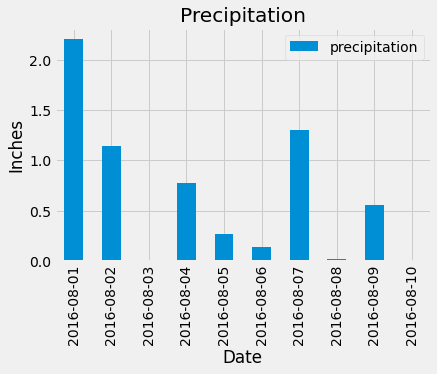

<Figure size 432x288 with 0 Axes>

In [83]:
precipitation_df.plot.bar(title = "Precipitation")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()
plt.savefig('Images/Precipitation.png')

In [16]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
year_ago

datetime.date(2016, 8, 23)

In [18]:
# Perform a query to retrieve the data and precipitation scores
ppt_data = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).all()
ppt_data

[('2010-01-01', 0.08, 65.0),
 ('2010-01-02', 0.0, 63.0),
 ('2010-01-03', 0.0, 74.0),
 ('2010-01-04', 0.0, 76.0),
 ('2010-01-06', None, 73.0),
 ('2010-01-07', 0.06, 70.0),
 ('2010-01-08', 0.0, 64.0),
 ('2010-01-09', 0.0, 68.0),
 ('2010-01-10', 0.0, 73.0),
 ('2010-01-11', 0.01, 64.0),
 ('2010-01-12', 0.0, 61.0),
 ('2010-01-14', 0.0, 66.0),
 ('2010-01-15', 0.0, 65.0),
 ('2010-01-16', 0.0, 68.0),
 ('2010-01-17', 0.0, 64.0),
 ('2010-01-18', 0.0, 72.0),
 ('2010-01-19', 0.0, 66.0),
 ('2010-01-20', 0.0, 66.0),
 ('2010-01-21', 0.0, 69.0),
 ('2010-01-22', 0.0, 67.0),
 ('2010-01-23', 0.0, 67.0),
 ('2010-01-24', 0.01, 71.0),
 ('2010-01-25', 0.0, 67.0),
 ('2010-01-26', 0.04, 76.0),
 ('2010-01-27', 0.12, 68.0),
 ('2010-01-28', 0.0, 72.0),
 ('2010-01-30', None, 70.0),
 ('2010-01-31', 0.03, 67.0),
 ('2010-02-01', 0.01, 66.0),
 ('2010-02-03', None, 67.0),
 ('2010-02-04', 0.01, 69.0),
 ('2010-02-05', 0.0, 67.0),
 ('2010-02-06', 0.0, 67.0),
 ('2010-02-07', 0.0, 64.0),
 ('2010-02-08', 0.0, 69.0),
 ('2010-

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
ppt_data_df = pd.DataFrame(ppt_data[:10], columns=['date','precipitation', 'tobs'])
ppt_data_df.set_index('date', inplace = True)
ppt_data_df

,precipitation,tobs
date,,
2010-01-01,0.08,65.0
2010-01-02,0.00,63.0
2010-01-03,0.00,74.0
2010-01-04,0.00,76.0
2010-01-06,NaN,73.0
2010-01-07,0.06,70.0
2010-01-08,0.00,64.0
2010-01-09,0.00,68.0
2010-01-10,0.00,73.0


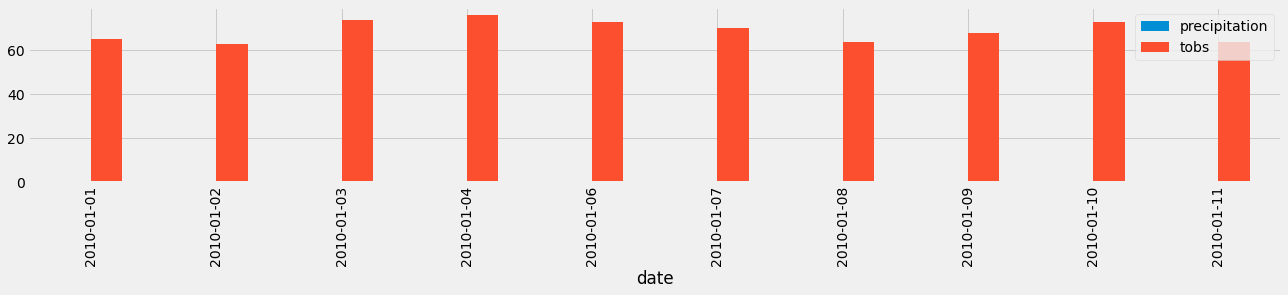

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
ppt_data_df.plot(kind = "bar", figsize = (20,3))
plt.show()

In [35]:
# All of precipitation data
just_precipitation = session.query(Measurement.prcp).\
    filter(Measurement.prcp >= 0.00).all()

just_precipitation_df = pd.DataFrame(just_precipitation, columns=['precipitation'])
just_precipitation_df.head()

,precipitation
0,0.08
1,0.00
2,0.00
3,0.00
4,0.06


In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_mean = just_precipitation_df['precipitation'].mean()
precip_count = just_precipitation_df['precipitation'].count()
precip_min = just_precipitation_df['precipitation'].min()
precip_max = just_precipitation_df['precipitation'].max()
precip_std = just_precipitation_df['precipitation'].std()

precipitate = just_precipitation_df['precipitation']
quartiles = precipitate.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.50]

In [79]:
precipitation_stats = pd.DataFrame({"Count":[precip_count],
                                   "Mean":[precip_mean],
                                    "Std":[precip_std],
                                    "Min":[precip_min],
                                    "25%":[lowerq],
                                    "50%":[median],
                                    "75%":[upperq],
                                    "Max":[precip_max],
                                    "Precipitation":["Precipitation"]
                                   })
precipitation_stats.set_index('Precipitation', inplace = True)
precipitation_stats

,Count,Mean,Std,Min,25%,50%,75%,Max
Precipitation,,,,,,,,
Precipitation,18103,0.160644,0.468746,0.0,0.0,0.01,0.11,11.53


In [109]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.name).\
    group_by(Station.name).count()
stations

9

In [149]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(Station.station, Measurement.tobs).\
    group_by(Station.station).\
    order_by(func.count(Station.station).desc()).all()
stations

[('USC00511918', 76.0),
 ('USC00513117', 76.0),
 ('USC00514830', 76.0),
 ('USC00516128', 76.0),
 ('USC00517948', 76.0),
 ('USC00518838', 76.0),
 ('USC00519281', 76.0),
 ('USC00519397', 76.0),
 ('USC00519523', 76.0)]

In [172]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
func.max('USC00511918')
func.min('USC00511918')
func.count('USC00511918')
func.avg('USC00511918')

<sqlalchemy.sql.functions.Function at 0x14df64ce240; avg>

In [173]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp = session.query(Station.station, Measurement.date, Measurement.tobs).\
    filter(Station.station == 'USC00519523').\
    filter(Measurement.date >= '2017-01-01')
highest_temp.all()

[('USC00519523', '2017-01-01', 62.0),
 ('USC00519523', '2017-01-02', 66.0),
 ('USC00519523', '2017-01-03', 63.0),
 ('USC00519523', '2017-01-04', 62.0),
 ('USC00519523', '2017-01-05', 63.0),
 ('USC00519523', '2017-01-06', 64.0),
 ('USC00519523', '2017-01-07', 66.0),
 ('USC00519523', '2017-01-08', 60.0),
 ('USC00519523', '2017-01-09', 64.0),
 ('USC00519523', '2017-01-10', 63.0),
 ('USC00519523', '2017-01-11', 78.0),
 ('USC00519523', '2017-01-12', 67.0),
 ('USC00519523', '2017-01-13', 67.0),
 ('USC00519523', '2017-01-14', 65.0),
 ('USC00519523', '2017-01-15', 66.0),
 ('USC00519523', '2017-01-16', 67.0),
 ('USC00519523', '2017-01-17', 66.0),
 ('USC00519523', '2017-01-18', 72.0),
 ('USC00519523', '2017-01-19', 73.0),
 ('USC00519523', '2017-01-20', 71.0),
 ('USC00519523', '2017-01-21', 72.0),
 ('USC00519523', '2017-01-22', 72.0),
 ('USC00519523', '2017-01-23', 72.0),
 ('USC00519523', '2017-01-24', 69.0),
 ('USC00519523', '2017-01-25', 72.0),
 ('USC00519523', '2017-01-26', 71.0),
 ('USC005195

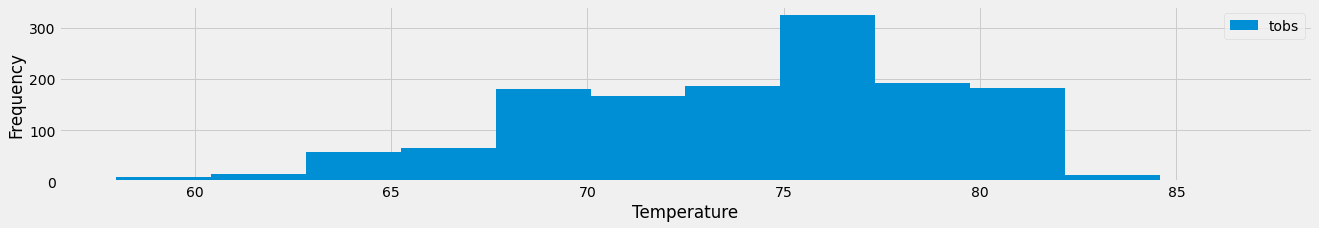

<Figure size 432x288 with 0 Axes>

In [174]:
one_station_df = pd.DataFrame(highest_temp, columns=['station', 'date', 'tobs'])
one_station_df
one_station_df.plot(kind = "hist", bins = 12, figsize = (20,3))
plt.xlabel("Temperature")
plt.show()
plt.savefig('Images/station_temps.png')

# Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
